In [1]:
# Re-import missing libraries due to kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import random
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

guitar stand 100.  
ceiling lamp 113.  
toilet 125.  
sink 126.  
strings 152.  
broccoli 166.  
microwave 19.  
durian 196.  
bed 46.  
toy cat 57.  
toy cow 60.  
stove 7.  
toy dragon 70.  
sofa 8   
coat rack 99.  

### Create all 7 angles for a single class

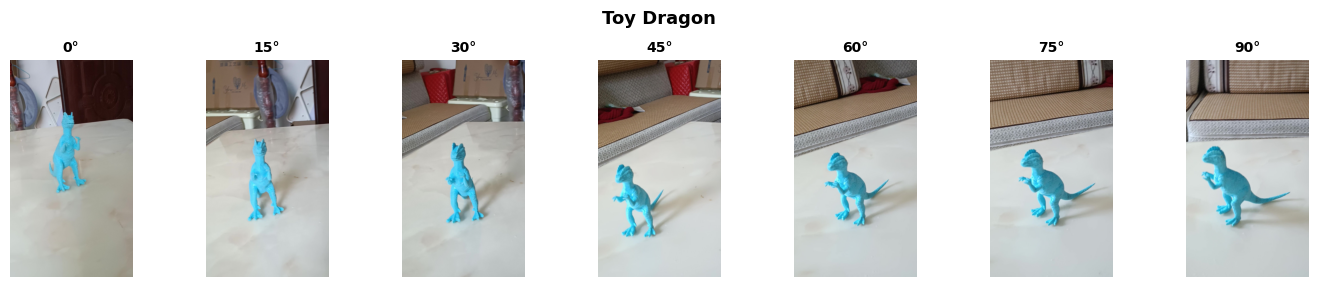

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- CONFIGURATION ---

base_path = "datasets/split_angles_mvimagenet"
class_id = 70
class_name = "Toy Dragon"
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

# --- STEP 1: COLLECT 7 ANGLE IMAGES FOR TOY DRAGON ---

img_paths = []
valid_angles = []

img_id = manual_overrides.get(class_mapping[class_id])

for angle in angle_degrees:
    angle_path = os.path.join(base_path, str(class_id), str(angle), "img")
    if not os.path.exists(angle_path):
        continue

    if img_id:
        matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
        if matching_files:
            img_paths.append(os.path.join(angle_path, matching_files[0]))
            valid_angles.append(angle)
    else:
        files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
        if len(files) >= 5:
            img_paths.append(os.path.join(angle_path, files[4]))
            valid_angles.append(angle)

# --- STEP 2: VISUALIZE RESULTS ---

fig, axs = plt.subplots(1, len(angle_degrees), figsize=(len(angle_degrees) * 2, 3))
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, angle in enumerate(angle_degrees):
    ax = axs[i]
    if angle in valid_angles:
        img_idx = valid_angles.index(angle)
        img = mpimg.imread(img_paths[img_idx])
        ax.imshow(img)
    ax.set_title(f"{angle}°", fontsize=10, fontweight='bold')
    ax.axis("off")

# Add the class name above the center image
center_col = len(angle_degrees) // 2
axs[center_col].text(
    0.5, 1.15, class_mapping[class_id],
    transform=axs[center_col].transAxes,
    ha='center', va='bottom',
    fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


### Generate 3 angles for 1 instance for each class

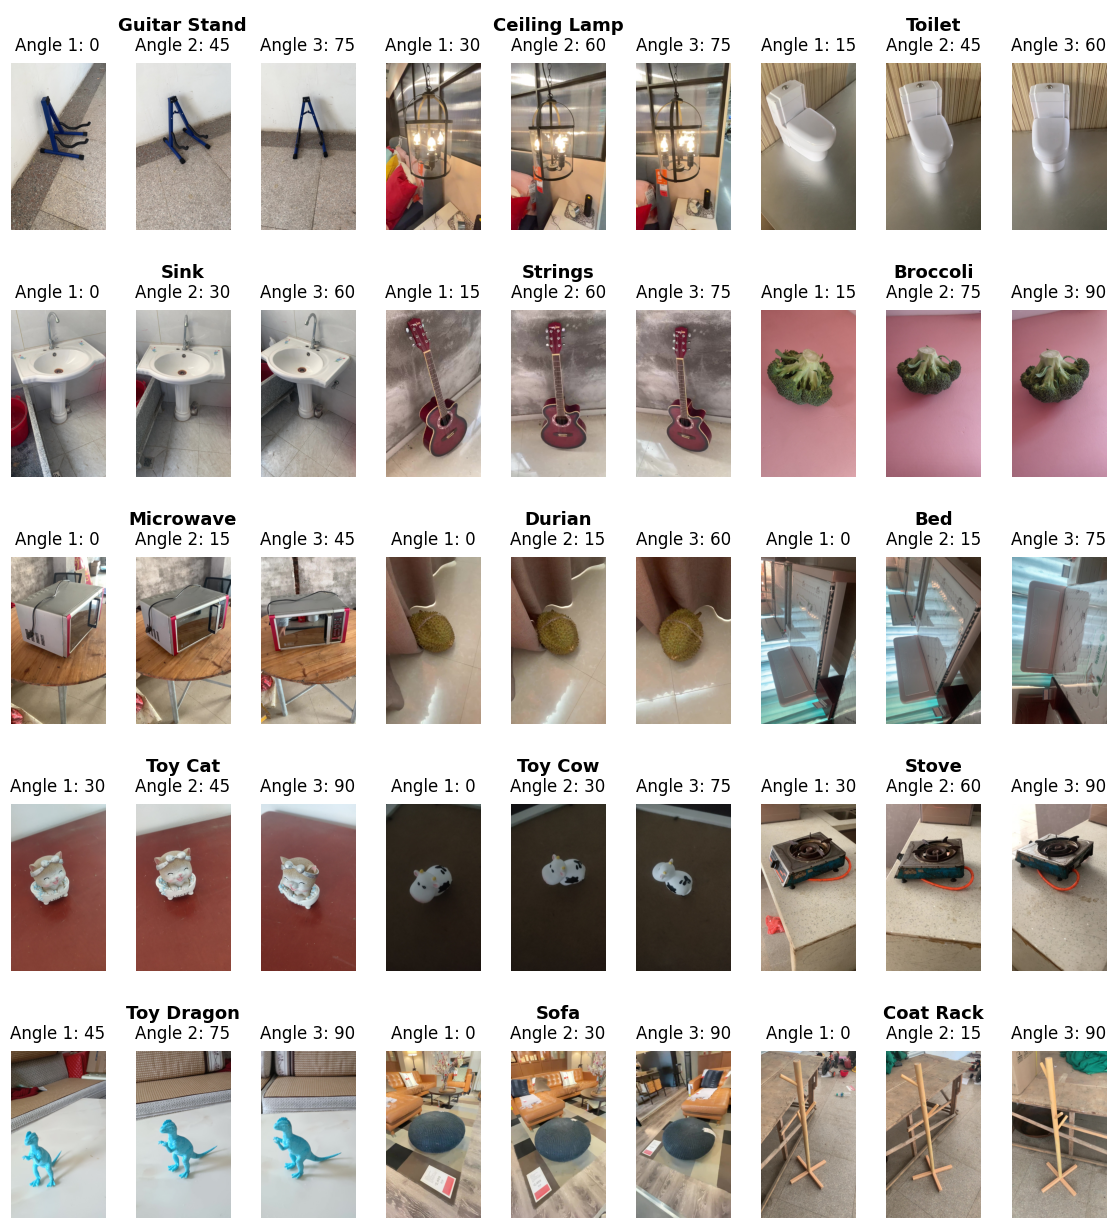

In [2]:
import os
import random
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- CONFIGURATION ---

base_path = "datasets/split_angles_mvimagenet"

class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}


manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

rotate_classes = {"Bed"}

# --- STEP 1: ANGLE COMBINATION ASSIGNMENT ---

angle_combinations = list(combinations(angle_degrees, 3))
random.shuffle(angle_combinations)

used_combinations = set()
angle_usage = defaultdict(int)
class_angle_selection = {}

for cls in class_numbers:
    for comb in angle_combinations:
        if comb not in used_combinations:
            used_combinations.add(comb)
            for angle in comb:
                angle_usage[angle] += 1
            class_angle_selection[cls] = sorted(comb)
            break

valid_class_image_paths = {}
confirmed_angles = {}

for cls, angles in class_angle_selection.items():
    filenames_per_angle = []
    for angle in angles:
        angle_path = os.path.join(base_path, str(cls), str(angle), "img")
        if not os.path.exists(angle_path):
            filenames_per_angle.append([])
            continue
        files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
        filenames_per_angle.append(files)

    if all(len(flist) >= 5 for flist in filenames_per_angle):

        fifth_files = [flist[4] for flist in filenames_per_angle]
        prefixes = [f.split("_")[0] for f in fifth_files]
        if all(p == prefixes[0] for p in prefixes):
            image_paths = [
                os.path.join(base_path, str(cls), str(angle), "img", fname)
                for angle, fname in zip(angles, fifth_files)
            ]
            valid_class_image_paths[cls] = image_paths
            confirmed_angles[cls] = angles
    
    

# --- STEP 3: APPLY MANUAL OVERRIDES ---

updated_class_image_data = []

for cls, original_paths in valid_class_image_paths.items():
    class_name = class_mapping.get(cls, str(cls))
    angles = confirmed_angles[cls]

    if class_name in manual_overrides:
        img_id = manual_overrides[class_name]
        new_paths = []
        for angle in angles:
            img_folder = os.path.join(base_path, str(cls), str(angle), "img")
            matching_files = [f for f in os.listdir(img_folder) if f.startswith(img_id)]
            if not matching_files:
                break
            new_paths.append(os.path.join(img_folder, matching_files[0]))

        if len(new_paths) == 3:
            updated_class_image_data.append((class_name, angles, new_paths))
    else:
        updated_class_image_data.append((class_name, angles, original_paths))

# --- STEP 4: VISUALIZE RESULTS (3 classes per row × 3 views) ---

n_classes = len(updated_class_image_data)
n_classes_per_row = 3
n_cols = n_classes_per_row * 3  # 3 views per class
n_rows = int(np.ceil(n_classes / n_classes_per_row))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.25, n_rows * 2.5))
fig.subplots_adjust(hspace=0.4, wspace=0)

# Ensure axs is 2D
if isinstance(axs, np.ndarray) and axs.ndim == 1:
    axs = axs.reshape((n_rows, n_cols))

# Plot each class's 3 views across the grid
for class_idx, (class_name, angles, img_paths) in enumerate(updated_class_image_data):
    row_idx = class_idx // n_classes_per_row
    col_start = (class_idx % n_classes_per_row) * 3

    for i, (angle, img_path) in enumerate(zip(angles, img_paths)):
        ax = axs[row_idx, col_start + i]
        img = mpimg.imread(img_path)

        if class_name in rotate_classes:
            img = np.rot90(img)

        ax.imshow(img)
        ax.axis("off")

        # Add titles above middle image
        if i == 1:
            # ax.set_title (f"{class_name}\nAngle 2: {angles[1]}", fontsize=12, fontweight='bold', pad=10)
            ax.set_title (f" \n ", fontsize=15, color='white', fontweight='bold', pad=10)
            # Top line: class name
            ax.text(0.5, 1.17, class_name, transform=ax.transAxes, ha='center', va='bottom', fontsize=13, fontweight='bold')
            # Second line: angle info
            ax.text(0.5, 1.05, f"Angle 2: {angles[1]}", transform=ax.transAxes, ha='center', va='bottom', fontsize=12)
        elif i == 0:
            # ax.set_title(f"\nAngle 1: {angles[0]}", fontsize=10, fontweight='bold', pad=10)
            ax.text(0.5, 1.05, f"Angle 1: {angles[0]}", transform=ax.transAxes, ha='center', va='bottom', fontsize=12)
        elif i == 2:
            # ax.set_title(f"\nAngle 3: {angles[2]}", fontsize=10, fontweight='bold', pad=10)
            ax.text(0.5, 1.05, f"Angle 3: {angles[2]}", transform=ax.transAxes, ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Create vertical image of all angles from 1 instance for each category

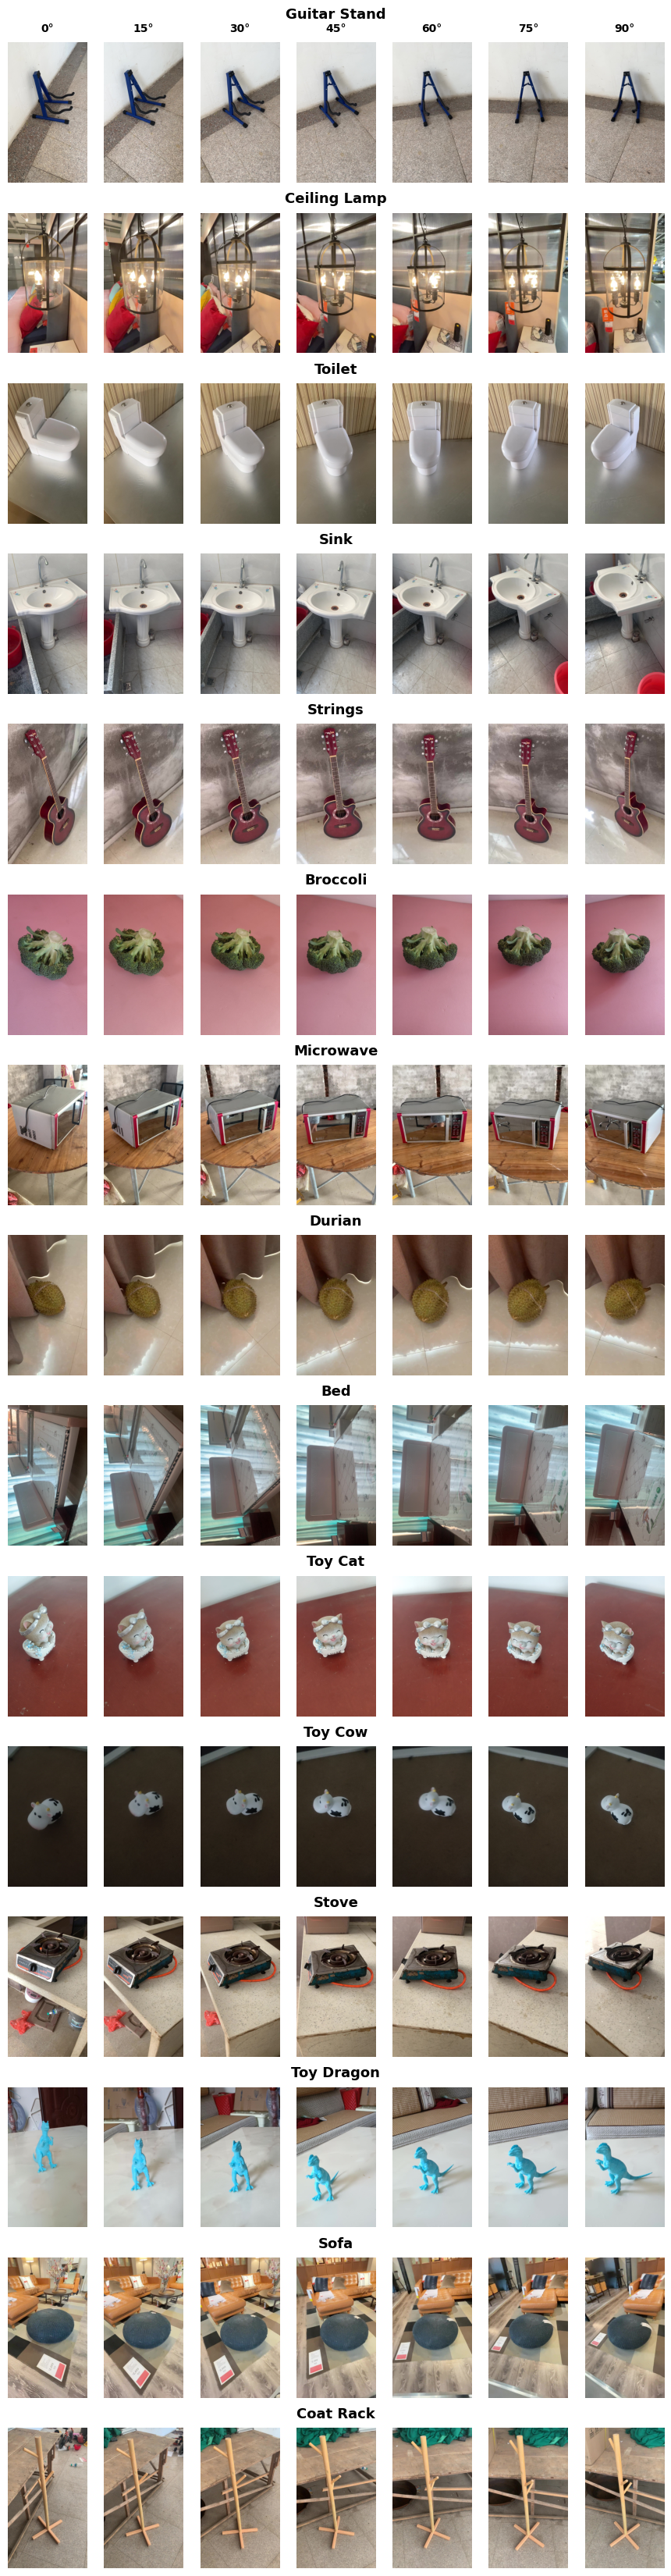

In [3]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# --- CONFIGURATION ---

base_path = "datasets/split_angles_mvimagenet"

class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

# class_mapping = {70: "Toy Dragon"}

manual_overrides = {
    "Sink": "4300efaa",
    "Strings": "1b00cfb0",
    "Microwave": "0a00c886",
    "Toy Cat": "0000a2fa",
    "Sofa": "0000b1ea",
    "Stove": "0b00bdbf"
}

rotate_classes = {"Bed"}

# --- STEP 1: COLLECT ALL ANGLES PER CLASS ---

all_angle_image_data = []

for cls in class_numbers:
    class_name = class_mapping.get(cls, str(cls))
    img_paths = []
    valid_angles = []

    if class_name in manual_overrides:
        img_id = manual_overrides[class_name]
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
            if matching_files:
                img_paths.append(os.path.join(angle_path, matching_files[0]))
                valid_angles.append(angle)
    else:
        for angle in angle_degrees:
            angle_path = os.path.join(base_path, str(cls), str(angle), "img")
            if not os.path.exists(angle_path):
                continue
            files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
            if len(files) >= 5:
                img_paths.append(os.path.join(angle_path, files[4]))
                valid_angles.append(angle)

    if len(img_paths) >= 1:
        all_angle_image_data.append((class_name, valid_angles, img_paths))
        
# --- STEP 2: VISUALIZE RESULTS (1 row per class, 7 columns for angles) ---

n_angles = len(angle_degrees)
n_classes = len(all_angle_image_data)

fig, axs = plt.subplots(n_classes, n_angles, figsize=(n_angles * 1.25, n_classes * 2.2))
fig.subplots_adjust(hspace=0.6, wspace=0.05)

axs = np.atleast_2d(axs)

# --- Plot each class on a new row ---
for row_idx, (class_name, angles, img_paths) in enumerate(all_angle_image_data):
    for col_idx in range(n_angles):
        ax = axs[row_idx, col_idx]
        if angle_degrees[col_idx] in angles:
            img_idx = angles.index(angle_degrees[col_idx])
            img = mpimg.imread(img_paths[img_idx])
            if class_name in rotate_classes:
                img = np.rot90(img)
            ax.imshow(img)

            # Only add angle labels on the first row
        if row_idx == 0:
            ax.set_title (f"{angle_degrees[col_idx]}°", fontsize=10, fontweight='bold', pad=10)

        ax.axis("off")

    # Add class name above center image
    center_col = n_angles // 2
    if row_idx == 0:
        axs[row_idx, center_col].text(
        0.5, 1.15, class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=13, fontweight='bold')
    else:
        axs[row_idx, center_col].text(
        0.5, 1.05, class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


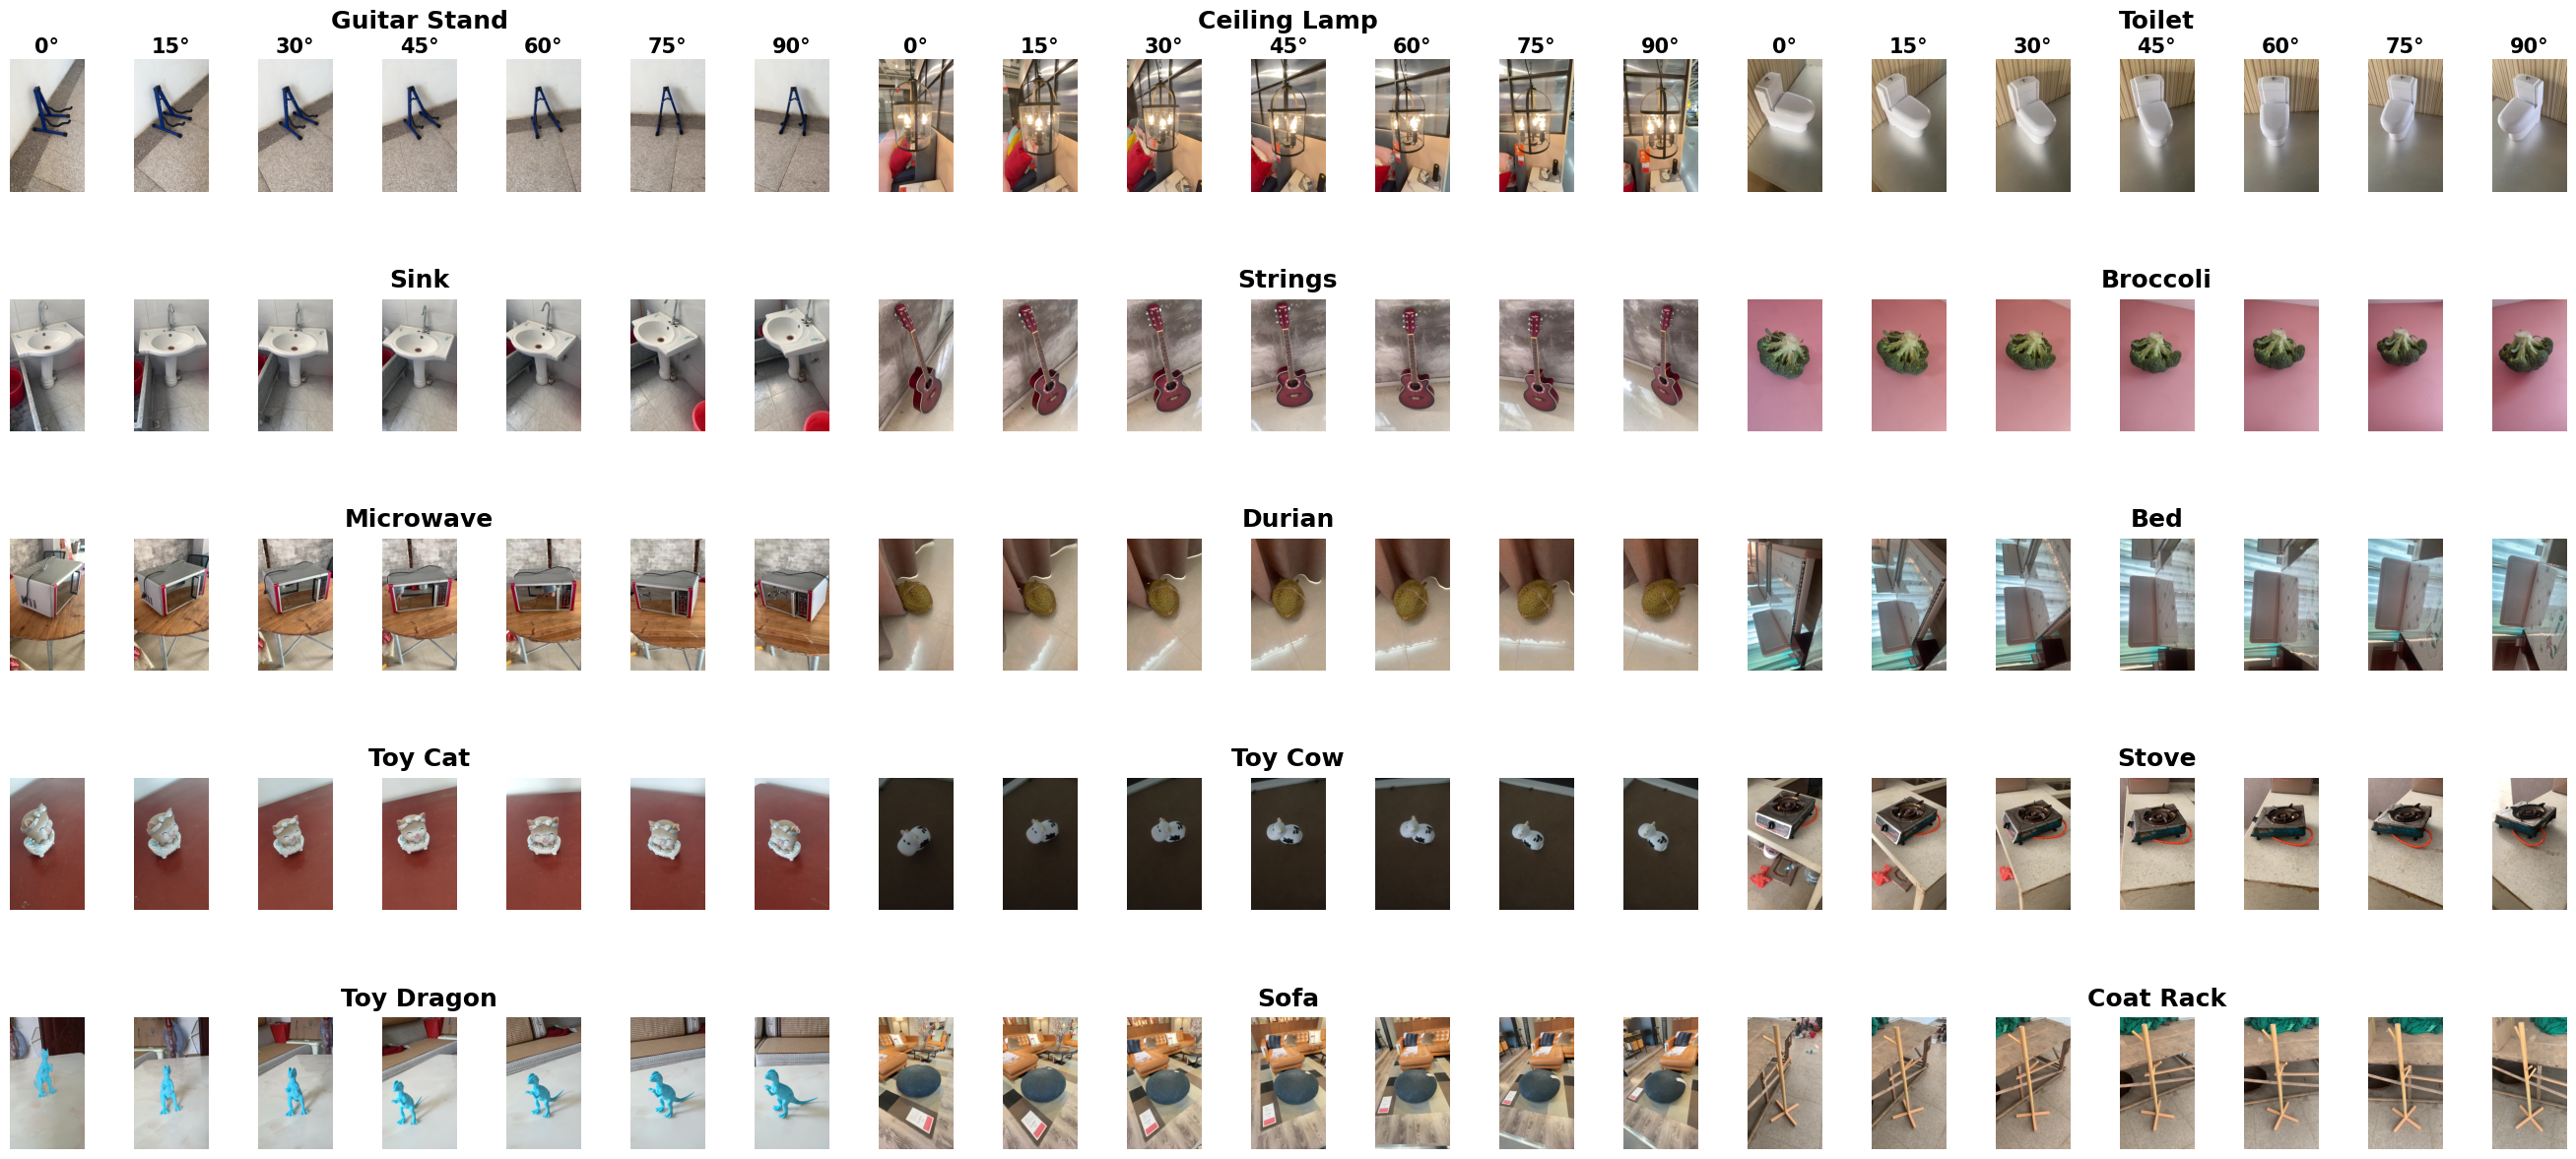

In [4]:
import math

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# uncomment if you don't want to run the previous 
# # --- CONFIGURATION ---

# base_path = "datasets/split_angles_mvimagenet"

# class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
# angle_degrees = [0, 15, 30, 45, 60, 75, 90]

# class_mapping = {
#     23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
#     8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
#     70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
# }

# # class_mapping = {70: "Toy Dragon"}

# manual_overrides = {
#     "Sink": "4300efaa",
#     "Strings": "1b00cfb0",
#     "Microwave": "0a00c886",
#     "Toy Cat": "0000a2fa",
#     "Sofa": "0000b1ea",
#     "Stove": "0b00bdbf"
# }

# rotate_classes = {"Bed"}

# # --- STEP 1: COLLECT ALL ANGLES PER CLASS ---

# all_angle_image_data = []

# for cls in class_numbers:
#     class_name = class_mapping.get(cls, str(cls))
#     img_paths = []
#     valid_angles = []

#     if class_name in manual_overrides:
#         img_id = manual_overrides[class_name]
#         for angle in angle_degrees:
#             angle_path = os.path.join(base_path, str(cls), str(angle), "img")
#             if not os.path.exists(angle_path):
#                 continue
#             matching_files = [f for f in os.listdir(angle_path) if f.startswith(img_id)]
#             if matching_files:
#                 img_paths.append(os.path.join(angle_path, matching_files[0]))
#                 valid_angles.append(angle)
#     else:
#         for angle in angle_degrees:
#             angle_path = os.path.join(base_path, str(cls), str(angle), "img")
#             if not os.path.exists(angle_path):
#                 continue
#             files = sorted([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
#             if len(files) >= 5:
#                 img_paths.append(os.path.join(angle_path, files[4]))
#                 valid_angles.append(angle)

#     if len(img_paths) >= 1:
#         all_angle_image_data.append((class_name, valid_angles, img_paths))

# --- STEP 2: VISUALIZE RESULTS (5 rows, 3 classes per row × 7 angles) ---

n_angles = len(angle_degrees)
n_classes = len(all_angle_image_data)
n_classes_per_row = 3
n_cols = n_classes_per_row * n_angles
n_rows = math.ceil(n_classes / n_classes_per_row)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.25, n_rows * 2.5))
fig.subplots_adjust(hspace=0.6, wspace=0.05)
axs = np.atleast_2d(axs)

# Plot each class’s 7 views
for class_idx, (class_name, angles, img_paths) in enumerate(all_angle_image_data):
    row_idx = class_idx // n_classes_per_row
    col_start = (class_idx % n_classes_per_row) * n_angles

    for i in range(n_angles):
        ax = axs[row_idx, col_start + i]
        if angle_degrees[i] in angles:
            img_idx = angles.index(angle_degrees[i])
            img = mpimg.imread(img_paths[img_idx])
            if class_name in rotate_classes:
                img = np.rot90(img)
            ax.imshow(img)

        # Only add angle titles under first row of each class group
        if row_idx == 0:
            ax.set_title(f"{angle_degrees[i]}°", fontsize=15, fontweight='bold', pad=5)

        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Add class name above center image
    center_col = col_start + (n_angles // 2)
    if row_idx == 0:
        axs[row_idx, center_col].text(
        0.5, 1.2, class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=18, fontweight='bold')
    else:
        axs[row_idx, center_col].text(
        0.5, 1.05, class_name,
        transform=axs[row_idx, center_col].transAxes,
        ha='center', va='bottom',
        fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
import os
import pandas as pd

# Configuration
base_path = "datasets/split_angles_mvimagenet"
class_numbers = [100, 113, 125, 126, 152, 166, 19, 196, 46, 57, 60, 7, 70, 8, 99]
angle_degrees = [0, 15, 30, 45, 60, 75, 90]

class_mapping = {
    23: "Laptop", 46: "Bed", 19: "Microwave", 99: "Coat Rack", 126: "Sink", 125: "Toilet",
    8: "Sofa", 166: "Broccoli", 7: "Stove", 152: "Strings", 196: "Durian", 113: "Ceiling Lamp",
    70: "Toy Dragon", 60: "Toy Cow", 100: "Guitar Stand", 57: "Toy Cat"
}

# Create a DataFrame to store the count data
count_data = []

for cls in class_numbers:
    class_name = class_mapping.get(cls, str(cls))
    row = {"Class": f"{cls}: {class_name}"}
    for angle in angle_degrees:
        angle_path = os.path.join(base_path, str(cls), str(angle), "img")
        if os.path.exists(angle_path):
            count = len([f for f in os.listdir(angle_path) if f.endswith(".jpg")])
        else:
            count = 0
        row[f"{angle}°"] = count
    count_data.append(row)

# Convert to DataFrame and display
df_counts = pd.DataFrame(count_data)



In [6]:
df_counts

Class   0°  15°  30°  45°  60°  75°  90°
0   100: Guitar Stand  218  218  218  218  218  218  218
1   113: Ceiling Lamp  154  154  154  154  154  154  154
2         125: Toilet   58   58   58   58   58   58   58
3           126: Sink   30   30   30   30   30   30   30
4        152: Strings  192  192  192  192  192  192  192
5       166: Broccoli  210  210  210  210  210  210  210
6       19: Microwave  120  120  120  120  120  120  120
7         196: Durian  758  758  758  758  758  758  758
8             46: Bed   23   23   23   23   23   23   23
9         57: Toy Cat  783  783  783  783  783  783  783
10        60: Toy Cow  735  735  735  735  735  735  735
11           7: Stove  197  197  197  197  197  197  197
12     70: Toy Dragon  627  627  627  627  627  627  627
13            8: Sofa   91   91   91   91   91   91   91
14      99: Coat Rack   97   97   97   97   97   97   97